In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from PIL import Image

PATH = r'D:\Code\kural_work\movie_generation\data\\'

In [111]:
def k_means_classifier(img,K=3):
    img_data = img.flatten().astype(np.float)
    img_data = img_data**2
    cent = np.zeros(K)
    for i in range(K):
        cent[i] = np.percentile(img_data,i/K*99.999)
    for _ in range(10):
        nearest_cent = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1)
        for i in range(K):
            cent[i] = np.mean(img_data[nearest_cent==i])
    nearest_cent = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1)
    return np.uint8(nearest_cent.reshape(*img.shape))

In [4]:
with open(PATH + 'k_means_img_data.pickle', 'rb') as f:
    img = pickle.load(f)

In [4]:
files = os.listdir(PATH)

In [20]:
img_ = Image.open(PATH + files[1])
nf = img_.n_frames
h = img_.height
w = img_.width
img = np.zeros((nf,h,w),dtype=np.uint16)
for f in range(nf):
    img_.seek(f)
    img[f,:,:] = np.asarray(list(img_.getdata())).reshape(h,w)

In [117]:
classes = k_means_classifier(img,K=3)

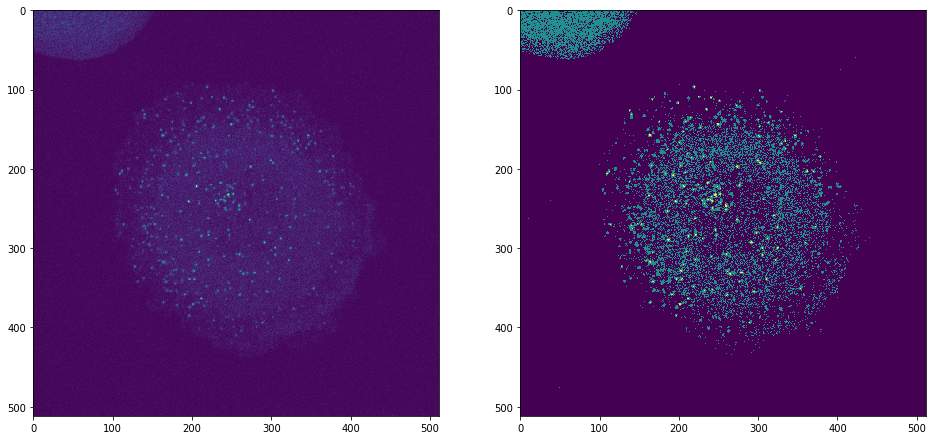

In [118]:
fig, ax = plt.subplots(1,2,figsize=[16,8])
# idx = np.random.choice(range(nf))
# idx=91
ax[0].imshow(img[idx,:,:])
ax[1].imshow(classes[idx,:,:])
plt.show()

In [119]:
img_data = img.flatten()
nearest_cent = classes.flatten()
dark_noise = img_data[nearest_cent==0]
cell_background = img_data[nearest_cent==1]
pits = img_data[nearest_cent==2]
something_else = img_data[nearest_cent==3]

C:\Users\joshu\Miniconda3\envs\fastai\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


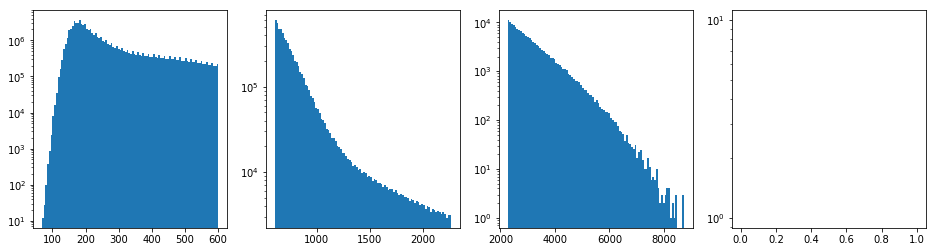

In [122]:
fig,ax = plt.subplots(1,4,figsize=[16,4])
ax[0].hist(dark_noise,bins=100)
ax[1].hist(cell_background,bins=100)
ax[2].hist(pits,bins=100)
ax[3].hist(something_else,bins=100)
for i in range(4):
    ax[i].set_yscale('log')
plt.show()

In [79]:
idx

131

In [84]:
%%timeit
np.random.choice(dark_noise)

1.93 µs ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [93]:
fake_img = np.zeros_like(img[idx,:,:])

In [96]:
for c in range(fake_img.shape[0]):
    for r in range(fake_img.shape[1]):
        if classes[idx,c,r] == 0:
            fake_img[c,r] = np.random.choice(dark_noise)
        if classes[idx,c,r] == 1:
            fake_img[c,r] = np.random.choice(cell_background)
        if classes[idx,c,r] == 2:
            fake_img[c,r] = np.random.choice(pits)

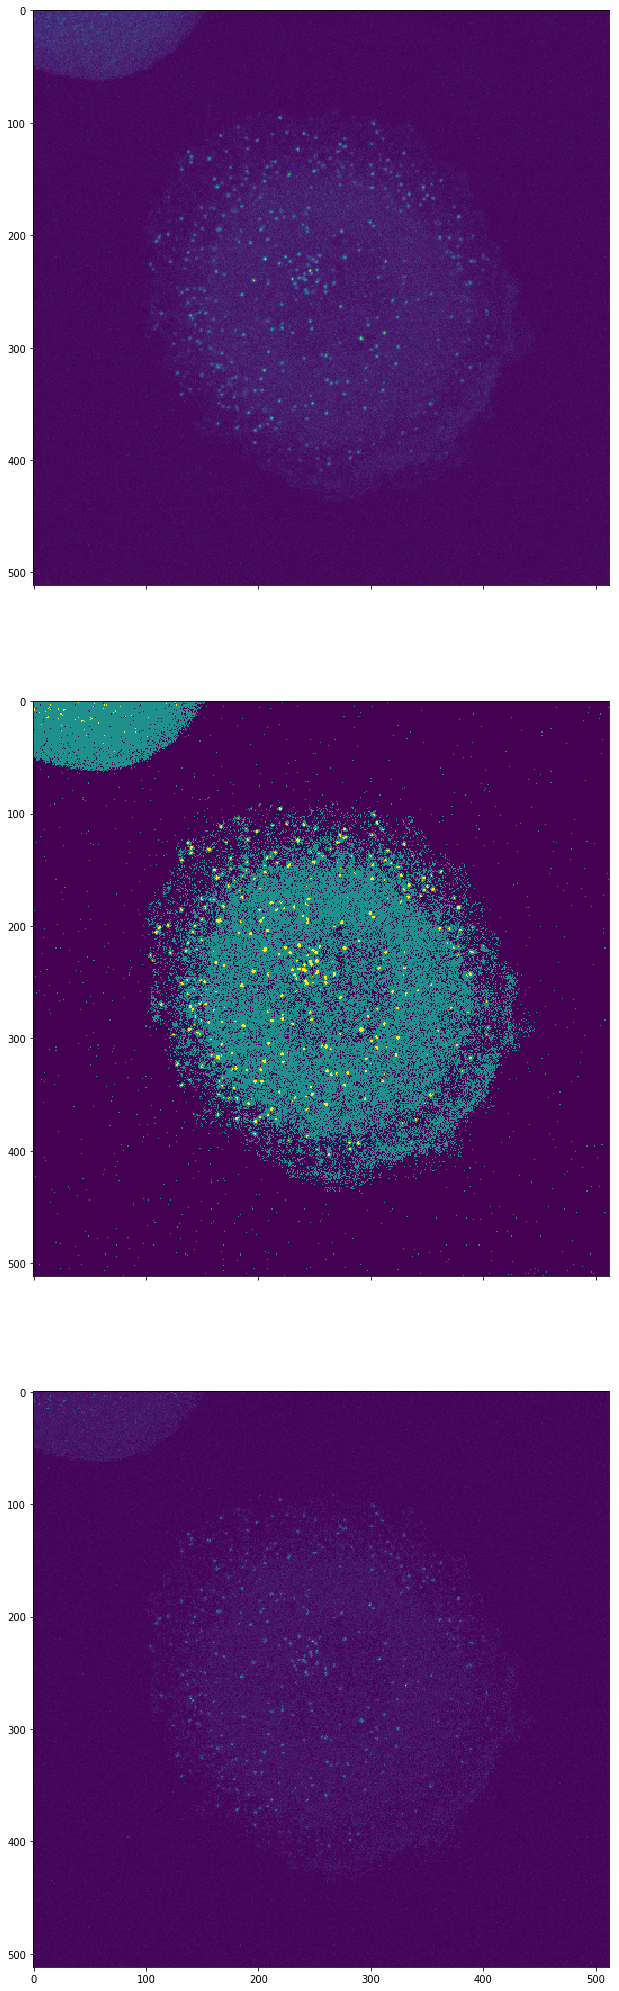

In [98]:
fig, ax = plt.subplots(3,1,figsize=[12,36], sharex=True)
# idx = np.random.choice(range(nf))
# idx=91
ax[0].imshow(img[idx,:,:])
ax[1].imshow(classes[idx,:,:])
ax[2].imshow(fake_img)
plt.show()